In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
population_size = 34310

In [3]:
n_sim = 500
n_day = 113

In [4]:
results = glob.glob('/nfs01/covid_sims/contact_delay_fall_realistic.1590458500.217757/contact_tracing_delay.4/*.csv')


In [5]:
cases_cumulative_pop = np.zeros((n_sim, n_day))

for i, res in enumerate(results):
    df = pd.read_csv(res)
    cases_cumulative_pop[i, :] = df['cumulative_mild'] + df['cumulative_severe']


In [6]:
df_indiv = pd.read_csv('/nfs01/covid_indiv_sims/realistic_res_indiv_day.csv')

cases_cumulative_indiv = np.zeros((n_sim, n_day))

for i in range(n_day):
    cases_cumulative_indiv[:, i] = df_indiv[df_indiv.day == i]['daily_cases'].to_numpy()
    if i >= 1:
        cases_cumulative_indiv[:, i] = cases_cumulative_indiv[:, i] + cases_cumulative_indiv[:, i - 1]


In [7]:
mean_cases_cumulative_pop = np.mean(cases_cumulative_pop, axis=0)
lower_quantile_cases_cumulative_pop = np.quantile(cases_cumulative_pop, 0.1, axis = 0)
upper_quantile_cases_cumulative_pop = np.quantile(cases_cumulative_pop, 0.9, axis = 0)

mean_cases_cumulative_indiv = np.mean(cases_cumulative_indiv, axis=0)
lower_quantile_cases_cumulative_indiv = np.quantile(cases_cumulative_indiv, 0.1, axis = 0)
upper_quantile_cases_cumulative_indiv = np.quantile(cases_cumulative_indiv, 0.9, axis = 0)


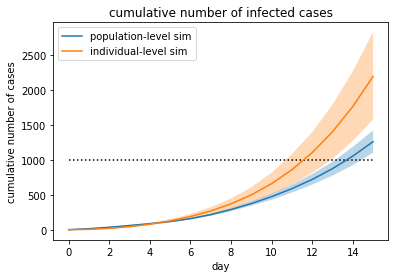

In [8]:
plt.plot(mean_cases_cumulative_pop[:16], label='population-level sim')
plt.fill_between(np.arange(16), lower_quantile_cases_cumulative_pop[:16], upper_quantile_cases_cumulative_pop[:16], alpha=0.3)

plt.plot(mean_cases_cumulative_indiv[:16], label='individual-level sim')
plt.fill_between(np.arange(16), lower_quantile_cases_cumulative_indiv[:16], upper_quantile_cases_cumulative_indiv[:16], alpha=0.3)


plt.hlines(1000, 0, 15, 'black', ':')
plt.legend(loc='upper left')
plt.xlabel('day')
plt.ylabel('cumulative number of cases')
plt.title('cumulative number of infected cases')
plt.savefig('comparison_0.pdf')